In [35]:
import numpy as np
import pandas as pd

In [36]:
data_col_names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
                "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
                "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login",
                "is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
                "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
                "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
                "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

df_kddtrain=pd.read_table("C:\\Users\\ANUKOOL SRIVASTAVA\\Desktop\\NSL\\NSL_KDD_dataset\\KDDTrain.txt", sep=",", names=data_col_names)
df_kddtrain = df_kddtrain.iloc[:,:-1]
df_kddtest=pd.read_table("C:\\Users\\ANUKOOL SRIVASTAVA\\Desktop\\NSL\\NSL_KDD_dataset\\KDDTest.txt",sep=",", names=data_col_names)
df_kddtest = df_kddtest.iloc[:,:-1]

#ommiting the column last_flag with help of iloc.

In [37]:
df_kddtrain

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [76]:
df_kddtrain['attack_class'].value_counts()

Normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: attack_class, dtype: int64

In [39]:
mapping= {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

df_kddtrain['attack_class'] = df_kddtrain['attack'].apply(lambda v: mapping[v])
df_kddtest['attack_class'] = df_kddtest['attack'].apply(lambda v: mapping[v])
df_kddtrain.drop(['attack'], axis=1, inplace=True)
df_kddtest.drop(['attack'], axis=1, inplace=True)

In [40]:
#Since 'num_outbound_cmds' fields have zero values we will delete it
df_kddtrain.drop(['num_outbound_cmds'], axis=1, inplace=True)
df_kddtest.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [41]:
df_kddtrain

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,Normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,Normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS


In [42]:
a=0
b=0
c=0
d=0
e=0
f=df_kddtrain['attack_class'].count()

for i in range(len(df_kddtrain)):
    if df_kddtrain['attack_class'][i]== 'DoS':
        a=a+1

for i in range(len(df_kddtrain)):
    if df_kddtrain['attack_class'][i]== 'Normal':
        b=b+1
        
for i in range(len(df_kddtrain)):
    if df_kddtrain['attack_class'][i]== 'Probe':
        c=c+1
        
for i in range(len(df_kddtrain)):
    if df_kddtrain['attack_class'][i]== 'R2L':
        d=d+1
        
for i in range(len(df_kddtrain)):
    if df_kddtrain['attack_class'][i]== 'U2R':
        e=e+1
        
print("Total attacks in KDDTrain= "+str(f))       
print("No of DoS attacks= "+str(a))   
print("No of Normal attacks= "+str(b))   
print("No of Probe attacks= "+str(c))   
print("No of R2L attacks= "+str(d))  
print("No of U2R attacks= "+str(e))   

Total attacks in KDDTrain= 125973
No of DoS attacks= 45927
No of Normal attacks= 67343
No of Probe attacks= 11656
No of R2L attacks= 995
No of U2R attacks= 52


In [43]:
k=0
l=0
m=0
n=0
o=0
p=df_kddtest['attack_class'].count()

for i in range(len(df_kddtest)):
    if df_kddtest['attack_class'][i]== 'DoS':
        k=k+1

for i in range(len(df_kddtest)):
    if df_kddtest['attack_class'][i]== 'Normal':
        l=l+1
        
for i in range(len(df_kddtest)):
    if df_kddtest['attack_class'][i]== 'Probe':
        m=m+1
        
for i in range(len(df_kddtest)):
    if df_kddtest['attack_class'][i]== 'R2L':
        n=n+1
        
for i in range(len(df_kddtest)):
    if df_kddtest['attack_class'][i]== 'U2R':
        o=o+1
        
print("Total attacks in KDDTest= "+str(p))       
print("No of DoS attacks= "+str(k))   
print("No of Normal attacks= "+str(l))   
print("No of Probe attacks= "+str(m))   
print("No of R2L attacks= "+str(n))  
print("No of U2R attacks= "+str(o))   

Total attacks in KDDTest= 22544
No of DoS attacks= 7458
No of Normal attacks= 9711
No of Probe attacks= 2421
No of R2L attacks= 2754
No of U2R attacks= 200


In [44]:
data = [[a, a/f*100,k,k/p*100], [b, b/f*100,l,l/p*100], [c,c/f*100,m,m/p*100],[d, d/f*100,n,n/p*100], [e, e/f*100,o,o/p*100]] 
#df = pd.DataFrame(data, columns = ['attack_train','freq%train','attack_test','freq%test'])
df_distribution = pd.DataFrame(data, index =['DoS', 'Normal', 'Probe', 'R2L','U2R']) 
df_distribution.columns=['attack_train','freq%train','attack_test','freq%test']
df_distribution

,attack_train,freq%train,attack_test,freq%test
DoS,45927,36.457812,7458,33.081973
Normal,67343,53.458281,9711,43.075763
Probe,11656,9.252776,2421,10.738999
R2L,995,0.789852,2754,12.216111
U2R,52,0.041279,200,0.887154


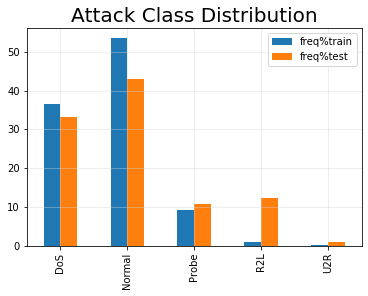

In [45]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plot = df_distribution[['freq%train', 'freq%test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);


In [46]:
import seaborn as sns
import sklearn
import imblearn
#Scaling Numerical Attributes

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
# extract numerical attributes and scale it to have zero mean and unit variance 
cols = df_kddtrain.select_dtypes(include=['float64','int64']).columns
#NOTE: here scaler.fit_transform is making all the values of dataset within a specific range so that mean=0 and 
# standard deviation = 1. This will make the algorithm easier and faster to apply on the dataset.
sc_train = scaler.fit_transform(df_kddtrain.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(df_kddtest.select_dtypes(include=['float64','int64']))
# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [79]:
sc_traindf

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,105,145,0,0,0,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,2231,384,0,0,0,0,0,1,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,0,0,0,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets like flag,etc.
cattrain = df_kddtrain.select_dtypes(include=['object']).copy()
cattest = df_kddtest.select_dtypes(include=['object']).copy()

# encode the categorical attributes
# for better understanding of machine we have to convert string data to numerical.
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

## Data Sampling

In [50]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
#NOT to make our machine biased towards majority class.
#Random oversampling involves randomly selecting examples from the minority class, with replacement,
#and adding them to the training dataset

# define columns and extract encoded train set for sampling 
sc_traindf = df_kddtrain.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass


In [51]:
# reshape target column to 1D array shape 
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)
#Converting 2d array cat_Y to 1d array y_test/train
c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

In [52]:
# apply the random over-sampling
ros = RandomOverSampler(random_state=42)#same random value will remain in the dataset.
X_res, y_res = ros.fit_sample(X, y)

In [53]:
y_res

array([1, 1, 0, ..., 4, 4, 4])

# Feature Selection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x25090250>,
      dtype=object)

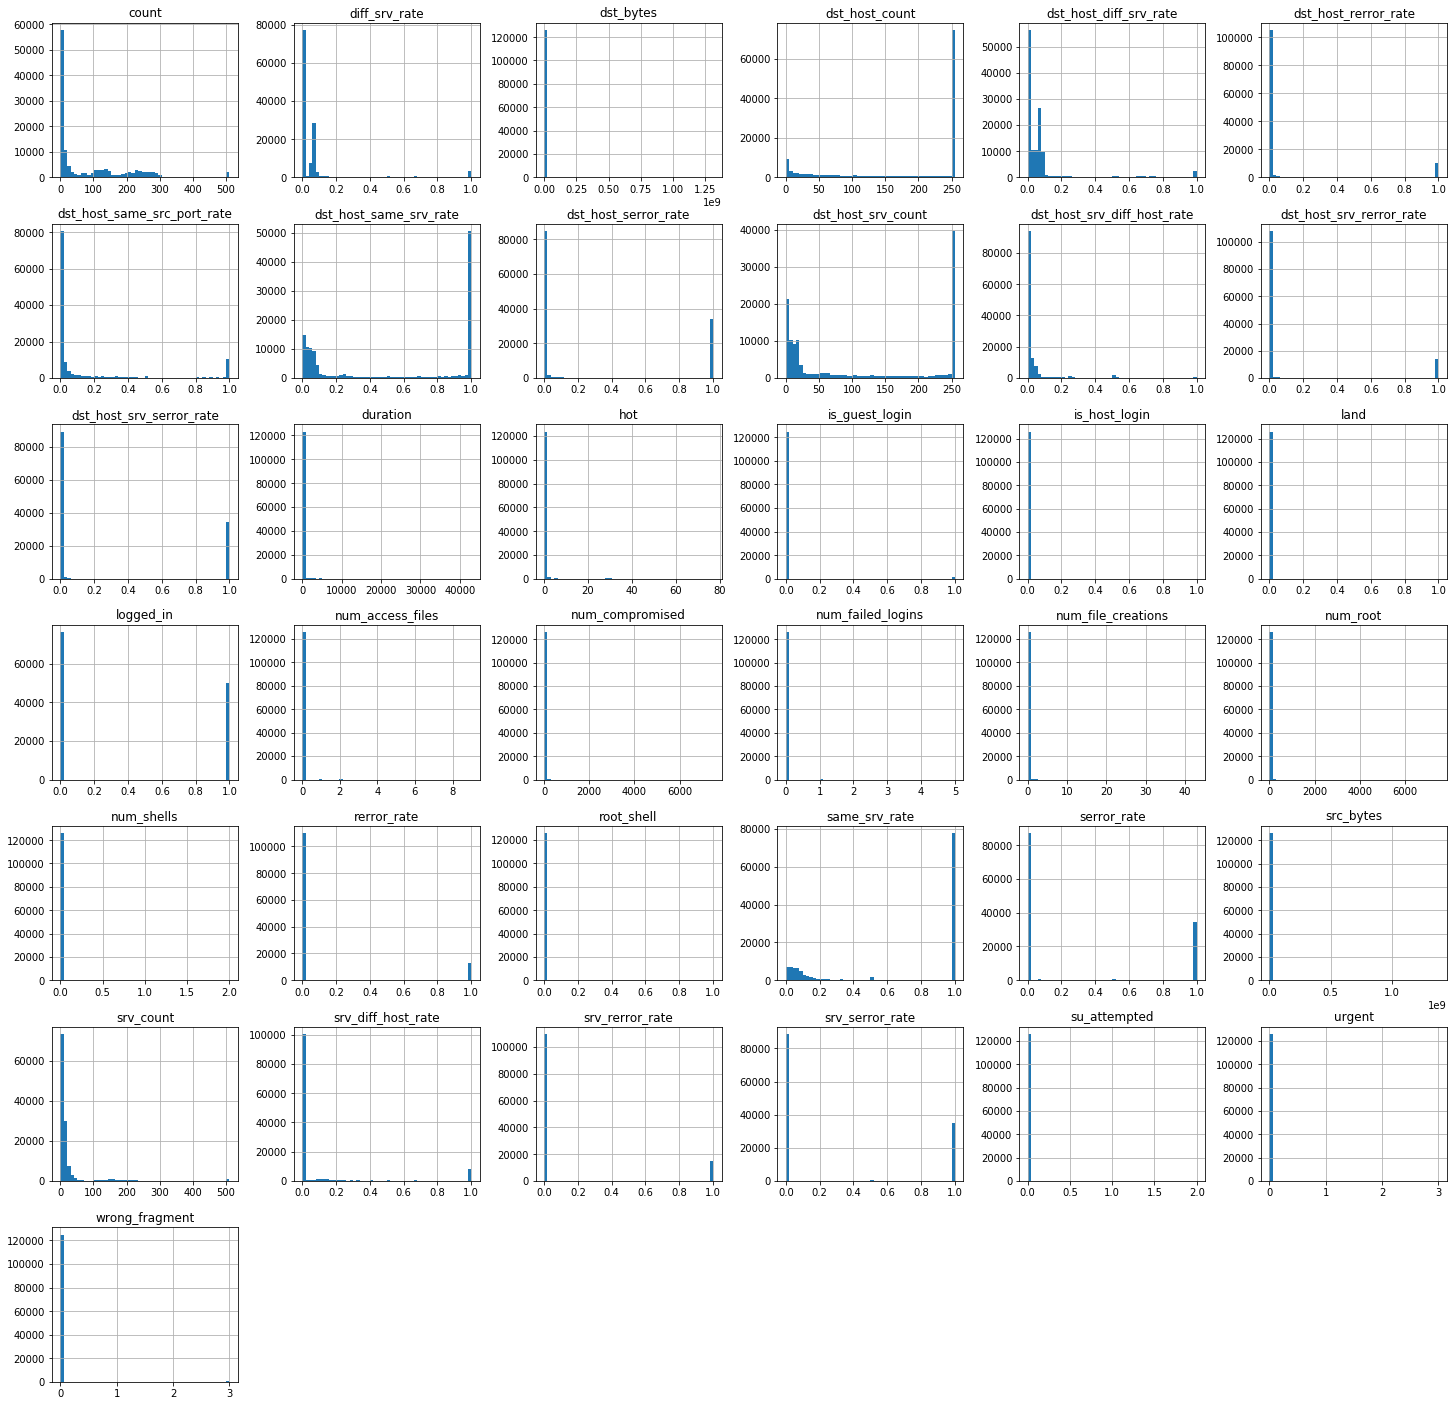

In [80]:
df_kddtrain.hist(bins=50,figsize=(25,25))

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();
rfc.fit(X_res, y_res);

In [55]:
score = np.round(rfc.feature_importances_,3)

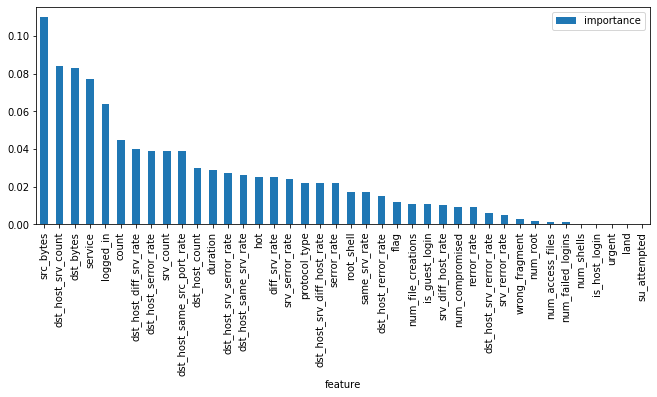

In [56]:
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [57]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_res, y_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclasscol)]
selected_features = [v for i, v in feature_map if i==True]

In [58]:
selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'service']

## Dataset Partition

In [81]:
# define columns to new dataframe
newcol = list(refclasscol)
newcol.append('attack_class')

# add a dimension to target
new_y_res = y_res[:, np.newaxis]

# create a dataframe from sampled data
res_arr = np.concatenate((X_res, new_y_res), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 

# create test dataframe
reftest = pd.concat([sc_testdf, testcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)

res_df.shape
reftest.shape

MemoryError: Unable to allocate array with shape (336715, 41) and data type float64

In [61]:
from collections import defaultdict
classdict = defaultdict(list)

# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
    
    print(classdict)
        
create_classdict()


defaultdict(<class 'list'>, {'Normal_DoS': [        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
147384 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
147385 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
147386 -0.110249  -0.007586  -0.004919 -0.014089       -0.089486 -0.007736   
147387 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
147388 -0.110249  -0.007757  -0.004919 -0.014089       11.743480 -0.007736   

             hot  n

In [62]:
for k, v in classdict.items():
    k

In [63]:
pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'

pretrain_Probe = classdict['Normal_Probe'][0]
pretest_Probe = classdict['Normal_Probe'][1]
grpclass_Probe = 'Normal_Probe'

pretrain_R2L = classdict['Normal_R2L'][0]
pretest_R2L = classdict['Normal_R2L'][1]
grpclass_R2L = 'Normal_R2L'

pretrain_U2R = classdict['Normal_U2R'][0]
pretest_U2R = classdict['Normal_U2R'][1]
grpclass_U2R = 'Normal_U2R'

In [64]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

Xresdf = pretrain 
newtest = pretest

Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()

Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()

enc.fit(Xresdfcat)

Xtestcat

Xtestcat=Xtestcat.reset_index()
del Xtestcat['index']

Xtestcat

Xtestcat.to_numpy()

X_train_1hotenc = enc.transform(Xresdfcat).toarray()
        
    # Transform test data
X_test_1hotenc = Xtestcat.to_numpy()

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

y_train



,attack_class
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
147384,0.0
147385,0.0
147386,0.0
147387,0.0


In [66]:
def modelPrediction(pretrain, pretest, grpclass):

    from sklearn.svm import SVC 
    #from sklearn.naive_bayes import BernoulliNB 
    from sklearn import tree
    from sklearn.model_selection import cross_val_score
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier

    # Train KNeighborsClassifier Model
    KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
    KNN_Classifier.fit(X_train, Y_train); 

    # Train LogisticRegression Model
    LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
    LGR_Classifier.fit(X_train, Y_train);

    # Train RandomForest Model
    RF_Classifier = RandomForestClassifier(n_estimators=100)
    RF_Classifier.fit(X_train,Y_train);
                
    # Train Decision Tree Model
    DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
    DTC_Classifier.fit(X_train, Y_train);

    from sklearn import metrics
    models = []
    #models.append(('SVM Classifier', SVC_Classifier))
    #models.append(('Naive Baye Classifier', BNB_Classifier))
    models.append(('Decision Tree Classifier', DTC_Classifier))
    models.append(('RandomForest Classifier', RF_Classifier))
    models.append(('KNeighborsClassifier', KNN_Classifier))
    models.append(('LogisticRegression', LGR_Classifier))
    #models.append(('VotingClassifier', VotingClassifier))

    for i, v in models:
        scores = cross_val_score(v, X_test, Y_test, cv=10)
        accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
        confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
        classification = metrics.classification_report(Y_test, v.predict(X_test))
        print()
        print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
        print()
        print ("Cross Validation Mean Score:" "\n", scores.mean())
        print()
        print ("Model Accuracy:" "\n", accuracy)
        print()
        print("Confusion matrix:" "\n", confusion_matrix)
        print()
        print("Classification report:" "\n", classification) 
        print()

    # This will be our selected algo which will be the model.

modelPrediction(pretrain, pretest, grpclass)
modelPrediction(pretrain_Probe, pretest_Probe, grpclass_Probe)
modelPrediction(pretrain_R2L, pretest_R2L, grpclass_R2L)
modelPrediction(pretrain_U2R, pretest_U2R, grpclass_U2R)


============================== Normal_DoS Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9997698368976862

Model Accuracy:
 0.9999480272634127

Confusion matrix:
 [[67343     0]
 [    7 67336]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

    accuracy                           1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686



============================== Normal_DoS RandomForest Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.999806961934811

Model Accuracy:
 0.9999480272634127

Confusion matrix:
 [[67342     1]
 [    6 67337]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
       


============================== Normal_U2R KNeighborsClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.99656981084704

Model Accuracy:
 0.9977577476500898

Confusion matrix:
 [[67287    56]
 [  246 67097]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

    accuracy                           1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686



============================== Normal_U2R LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9808072130256406

Model Accuracy:
 0.9808443342292443

Confusion matrix:
 [[65532  1811]
 [  769 66574]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     67343
         1.0     

In [ ]:
# This will be our selected algo which will be the model.

#DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
#DTC_Classifier.fit(X_train, Y_train);
Xnew = X_train
ynew = DTC_Classifier.predict(Xnew)
print(" Norml vs Dos \n\n X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

In [ ]:
print("X=%s, Predicted=%s" % (Xnew[0], ynew[22]))

In [ ]:
  if ynew[0] == 1.0:
     print('Alarm it')